In [57]:
# Imports
from matplotlib import pyplot as plt
import numpy as np
import csv
import pandas as pd
import sys
import re
from stop_words import get_stop_words
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import collections
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
#import the first dataSet spam_ham_dataset
df = pd.read_csv (r'spam_ham_dataset.csv', index_col=False)
display(df)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
df.drop("label", axis=1, inplace=True)
#display(df)
print(df.columns)

Index(['Unnamed: 0', 'text', 'label_num'], dtype='object')


In [4]:
df.rename(columns = {'text':'email', 'label_num':'label'}, inplace = True)

In [5]:
display(df)

,Unnamed: 0,email,label
0,605,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,"Subject: photoshop , windows , office . cheap ...",1
4,2030,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,1518,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,Subject: industrial worksheets for august 2000...,0


In [6]:
#import the second dataSet spam_or_not_spam
df_ = pd.read_csv (r'spam_or_not_spam.csv', index_col=False)
display(df_)

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0
...,...,...
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1


In [7]:
# merging the 2 dataSets
merge= [df, df_]
result= pd.concat([df, df_], axis=0, ignore_index=True)
display(result)

,Unnamed: 0,email,label
0,605.0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349.0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624.0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685.0,"Subject: photoshop , windows , office . cheap ...",1
4,2030.0,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
8166,NaN,abc s good morning america ranks it the NUMBE...,1
8167,NaN,hyperlink hyperlink hyperlink let mortgage le...,1
8168,NaN,thank you for shopping with us gifts for all ...,1
8169,NaN,the famous ebay marketing e course learn to s...,1


In [8]:
#getting the spam emails
spam=result.loc[result['label'] == 1]
#getting the ham emails
ham=result.loc[result['label'] == 0]

In [9]:
spam['email'].str.len()

3        414.0
7        784.0
10      6922.0
11       337.0
13       395.0
         ...  
8166     561.0
8167     468.0
8168     864.0
8169    4129.0
8170    1981.0
Name: email, Length: 1999, dtype: float64

In [10]:
ham['email'].str.len()

0        327
1         97
2       2524
4        336
5        480
        ... 
7666     979
7667    1618
7668     326
7669     840
7670    1313
Name: email, Length: 6172, dtype: int64

In [13]:
result.drop('Unnamed: 0', axis=1, inplace= True)

In [14]:
nan_no= result.isnull().sum()
print('nan number', nan_no)
# resultN= result.dropna()
# check= resultN['email'].isnull().sum()
# print('nan after dropping', check)

nan number email    1
label    0
dtype: int64


In [15]:
len(result)

8171

In [16]:
result= result.dropna()

In [17]:
len(result)

8170

In [18]:
#preprocess the data
result['email']= result['email'].str.lower()
#display(result)

In [19]:
result['email'] = result['email'].str.replace(r'[^a-zA-Z\s]+', '')

<ipython-input-19-863fe4f968bd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  result['email'] = result['email'].str.replace(r'[^a-zA-Z\s]+', '')


In [20]:
result['email']= result['email'].apply(wordpunct_tokenize)

In [21]:
display(result)

,email,label
0,"[subject, enron, methanol, meter, this, is, a,...",0
1,"[subject, hpl, nom, for, january, see, attache...",0
2,"[subject, neon, retreat, ho, ho, ho, we, re, a...",0
3,"[subject, photoshop, windows, office, cheap, m...",1
4,"[subject, re, indian, springs, this, deal, is,...",0
...,...,...
8166,"[abc, s, good, morning, america, ranks, it, th...",1
8167,"[hyperlink, hyperlink, hyperlink, let, mortgag...",1
8168,"[thank, you, for, shopping, with, us, gifts, f...",1
8169,"[the, famous, ebay, marketing, e, course, lear...",1


In [22]:
# Use English stemmer.
stemmer = SnowballStemmer("english")
result['email']= result['email'].apply(lambda x: [stemmer.stem(y) for y in x])

In [23]:
display(result)

,email,label
0,"[subject, enron, methanol, meter, this, is, a,...",0
1,"[subject, hpl, nom, for, januari, see, attach,...",0
2,"[subject, neon, retreat, ho, ho, ho, we, re, a...",0
3,"[subject, photoshop, window, offic, cheap, mai...",1
4,"[subject, re, indian, spring, this, deal, is, ...",0
...,...,...
8166,"[abc, s, good, morn, america, rank, it, the, n...",1
8167,"[hyperlink, hyperlink, hyperlink, let, mortgag...",1
8168,"[thank, you, for, shop, with, us, gift, for, a...",1
8169,"[the, famous, ebay, market, e, cours, learn, t...",1


In [24]:
stop_words= stopwords.words('english')
result['email']= result['email'].apply(lambda x: ' '.join([word for word in x if word not in stop_words]))

In [25]:
display(result)

,email,label
0,subject enron methanol meter follow note gave ...,0
1,subject hpl nom januari see attach file hplnol...,0
2,subject neon retreat ho ho ho around wonder ti...,0
3,subject photoshop window offic cheap main tren...,1
4,subject indian spring deal book teco pvr reven...,0
...,...,...
8166,abc good morn america rank number christma toy...,1
8167,hyperlink hyperlink hyperlink let mortgag lend...,1
8168,thank shop us gift occas free gift number numb...,1
8169,famous ebay market e cours learn sell complet ...,1


#### from sklearn.feature_extraction.text import CountVectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features= 1000)
X = vectorizer.fit_transform(result.email)
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
display(df_bow_sklearn)

,abil,abl,abov,accept,access,accord,account,across,act,action,...,xls,xml,xp,yahoo,year,yes,yet,young,zero,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8168,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_bow_sklearn= (df_bow_sklearn.T/ result['email'].apply(lambda x: len(x.split())).values).T # 3ashan l afyad en ykon fi percentage mesh count

In [36]:
np.any(~df_bow_sklearn.isna(), axis=1).values

array([ True,  True,  True, ...,  True,  True,  True])

In [37]:
result = result[np.any(~df_bow_sklearn.isna(), axis=1).values] #bysheel l rows el nan

In [38]:
len(result)

8168

In [39]:
df_bow_sklearn= df_bow_sklearn.dropna()

In [40]:
# df_bow_sklearn.sum(axis= 1) #bataked men l sum may3adesh one 3shan percent

In [41]:
 X_train, X_test, y_train, y_test = train_test_split(df_bow_sklearn, result['label'], test_size=0.33, random_state=42)

In [42]:
#initialize multiple classification models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

In [43]:
#create a dictionary of variables and models
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

In [44]:
#fit the data onto the models
def train(clf, X_train, y_train):
    clf.fit(X_train, y_train)

def predict(clf, X_train):
    return (clf.predict(X_train))

In [59]:
pred_scores_word_vectors = []
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred),precision_score(y_test, pred, average='macro'), recall_score(y_test, pred, average='macro'), f1_score(y_test, pred, average='macro') ]))

In [60]:
pred_scores_word_vectors

[('SVC',
  [0.8082344213649851,
   0.877386925437871,
   0.5804997302823881,
   0.5841758962999426]),
 ('KN',
  [0.6828635014836796,
   0.6751117960456778,
   0.749277094074994,
   0.654296302928511]),
 ('NB',
  [0.7800445103857567,
   0.8892416884572283,
   0.5155228758169934,
   0.4678341024255781]),
 ('DT',
  [0.9254451038575667,
   0.8845038860528416,
   0.9136887960558504,
   0.8977556067378778]),
 ('LR',
  [0.8716617210682492,
   0.8673474152099208,
   0.7467508436516002,
   0.7842581456880122]),
 ('RF',
  [0.9706973293768546,
   0.9620035224558556,
   0.9539237640033621,
   0.9578853870495152])]

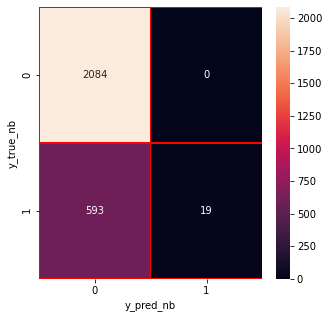

In [50]:
y_pred_nb = mnb.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()

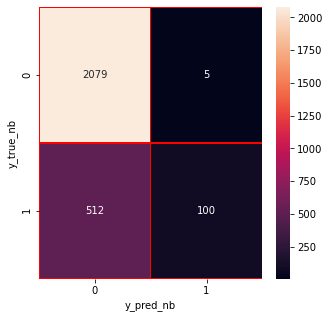

In [51]:
y_pred_nb = svc.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()

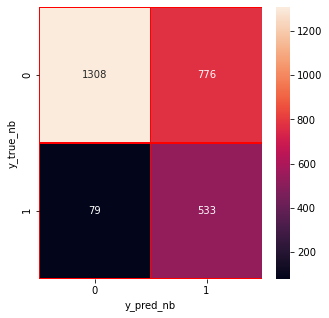

In [52]:
y_pred_nb = knc.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()

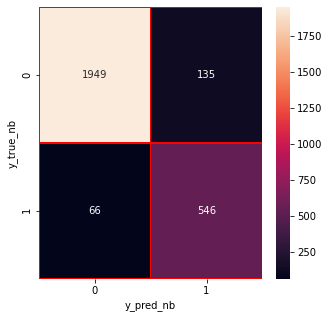

In [53]:
y_pred_nb = dtc.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()

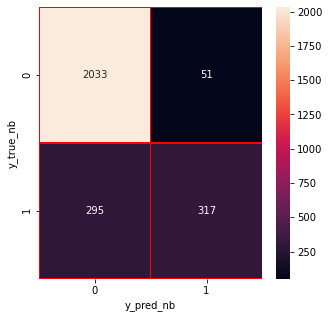

In [54]:
y_pred_nb = lrc.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()

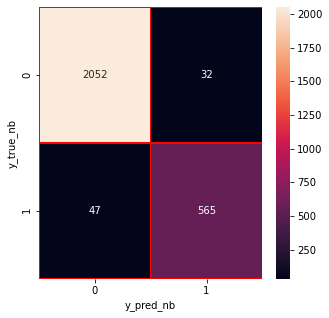

In [55]:
y_pred_nb = rfc.predict(X_test)
y_true_nb = y_test
cm = confusion_matrix(y_true_nb, y_pred_nb)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_nb")
plt.ylabel("y_true_nb")
plt.show()